## <center>4741</center> 
### <center>Home work 1 (Question 3 and 4) </center> 
#### <center>Submitted by </center> 
##### <center> Aman jain (aj644), Vineel Yellapantula (vy45) </center> 

In [145]:
using Random # load the Random package to generate random numbers
using Plots  # load the Plots plotting library

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions by adding a new cell (using the "+" icon on the toolbar), and setting it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). 

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

# Generate data
Generate 50 random datapoints in 2 dimensions.
Note that the last column is fixed at 1 to capture the offset

In [146]:
### DO NOT CHANGE THIS CODE BLOCK ###
# this code sets the random number generator, 
# so everyone in the class will have consistent results
Random.seed!(3)

# set dimensions
n = 50
d = 2
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X = [randn(n, d) ones(n)]

# Generate the target function w♮
w♮ = randn(d+1)

# Store the correct decision for each datapoint in y
# sign of x, returning -1, 0, or +1
y = sign.(X*w♮);

In [147]:
w♮

3-element Array{Float64,1}:
 -1.1190703941943563
  1.2975091637129141
  0.4736813190084895

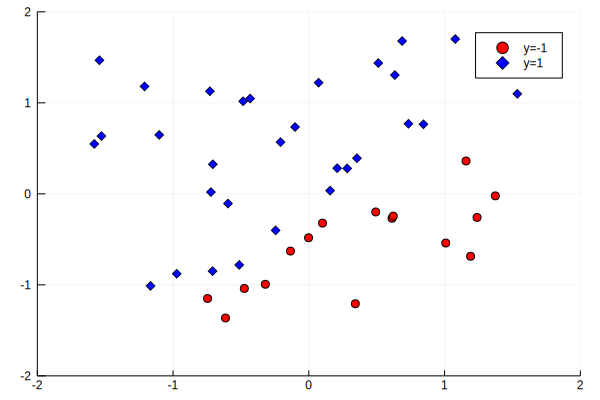

In [148]:
# plot data points X and color according to y
# '!' instructs to plot on the same grapph
scatter(X[y.==-1,1], X[y.==-1,2], color=:red, marker=:circle, label="y=-1")
scatter!(X[y.==1,1], X[y.==1,2], color=:blue, marker=:diamond, label="y=1")

# xlims and ylims define the graph size on X and Y aixs

xlims!((-2,2))
ylims!((-2,2))

## I have slightly modified below function to plot 2 Ws - one true value of w, w♮, and another value of w as suggested by perceptron algorithm

Although, Function will work even if a single value of w is provided. 

In [151]:
"""
This function takes data points X, plots them, and colors them correctly according to y.
This function also plots the line w'*x = 0.
We are plotting just the first two dimensions of x; 
the last (offset) coordinate of w sets the offset of the line from the origin.
"""
function plot_perceptron(X,y,w♮,w)
    # plot data points X and color according to y
    p = scatter(X[y.==1,1], X[y.==1,2], color=:blue, marker=:diamond, label="y=1")
    scatter!(p, X[y.==-1,1], X[y.==-1,2], color=:red, marker=:circle, label="y=-1")
    
    # plot vector w
    x1samples = [minimum(X[:,1]), maximum(X[:,1])]
    if w[2]!=0
        plot!(p, x1samples, [-(w[1]*x1 + w[3])/w[2] for x1 in x1samples], color=:black, label="classification boundary")
    end
    
    # plot vector w♮
    if w♮[2]!=0
        plot!(p, x1samples, [-(w♮[1]*x1 + w♮[3])/w♮[2] for x1 in x1samples], color=:blue, label="True w♮")
    end
    
    # set figure limits
    xlims!(p, (-2,2))
    ylims!(p, (-2,2))
    
    return p
end

plot_perceptron

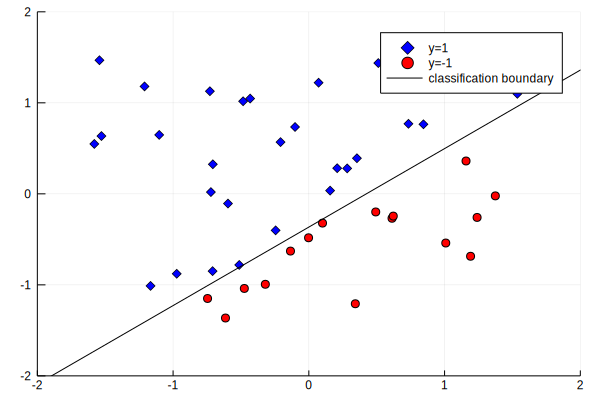

In [152]:
# Double check our function by plotting the points with the truth vector 
plot_perceptron(X,y,w♮)

# a) Code the missing parts of the Perceptron algorithm
Inputs to Perceptron are: 
* required arguments:
    * X = data points
    * Y = true values
* optional arguments:
    * maxsteps = maximum number of updates to w (default: 100)
    * w = initial guess of w (default: random)

Perceptron should start with the input guess of w, make at most maxsteps updates, and return the final w.

##### I have filled the below code for perceptron. 
##### 2 print commands tells us if perceptron is convergence for a given X and Y or not - if convergent how many iterations it took. 
##### Below function is linear in time as well. 

In [153]:
function perceptron(X,y;
                    maxsteps=100, # 
                    w = rand(size(X,2))) # initial guess for w
    
    for i = 1:maxsteps
        y_pred = sign.(X*w)
        y_missclassified = ones(size(X,1)) - (y_pred.==y)*1
        if sum(y_missclassified) == 0
            print("algorithm converged ", i-1, "iterations only")
            break
        end
        y_multiply = y.*y_missclassified
        w_incremental = X'*y_multiply
        w = w+w_incremental
        if i >= maxsteps
            print("algorithm did not converged even after", maxsteps, "iterations")
        end
    end    
    

    ## YOUR CODE HERE p
    
    return w
end

perceptron (generic function with 1 method)

In [154]:
## Rough work
#y = [1 2 3]'
#y_pred = [1 2 3]'
#y_missclassified = ones(3) - (y_pred.==y)*1
#sum(y_missclassified)

#y.*y_missclassified
#i = 2
#print("breaking off at ", i, "only")

# b) Run perceptron on linearly separable data set

##### For this part, perceptron converges after 6 iterations only. 
##### Plot containing both w_true and w_calculated has been provided. Please note that both of these are not equal as many classification boundaries are possible in given linearly seperable data set. 

In [155]:
w_final = perceptron(X,y)

algorithm converged 6iterations only

3-element Array{Float64,1}:
 -15.2565198534639  
  16.427392611962926
   5.851999190276057

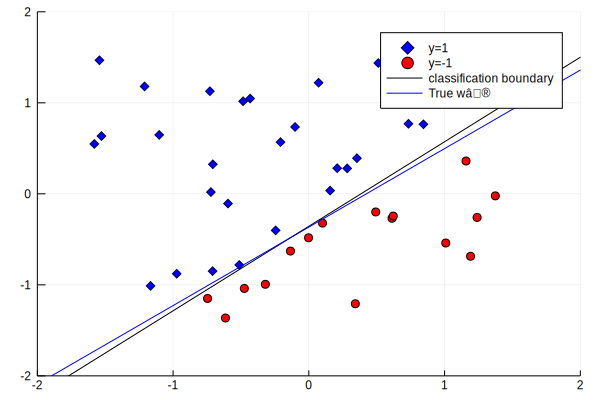

In [156]:
plot_perceptron(X,y,w♮,w_final)

# c) Run perceptron on data sets of size n = 20, 100, and 1000

#### Some key observations: 
- number of iterations for convergence increased with n. 
- number of iterations for convergence in case b (n=50), was found to be in between number of iterations for n=20 and n=100.
- convergence was achieved in all three cases. n = 20,100 and 1000. 


##### Perceptron run for n = 20

In [161]:
# set dimensions
n_20 = 20
n_100 = 100
n_1000 = 1000
d = 2
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X_20 = [randn(n_20, d) ones(n_20)]
X_100 = [randn(n_100, d) ones(n_100)]
X_1000 = [randn(n_1000, d) ones(n_1000)]

# Generate the target function w♮
w2♮ = randn(d+1)

3-element Array{Float64,1}:
  0.6579088352742319
 -1.23718415848714  
 -1.0562109659819299

algorithm converged 4iterations only

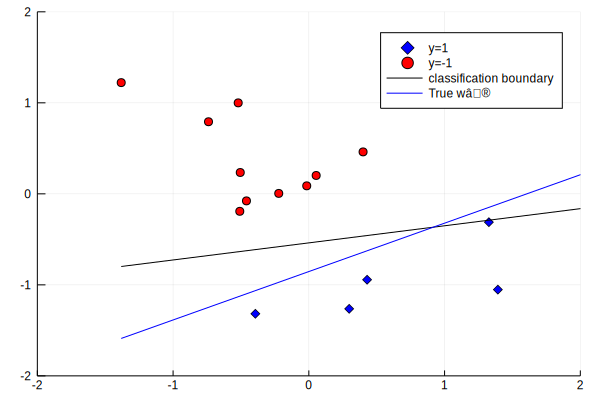

In [162]:
# Store the correct decision for each datapoint in y
# sign of x, returning -1, 0, or +1
y_20 = sign.(X_20*w2♮);
X_20;
w_20_final = perceptron(X_20,y_20)
plot_perceptron(X_20,y_20,w2♮,w_20_final)

##### Perceptron run for n = 100

algorithm converged 6iterations only

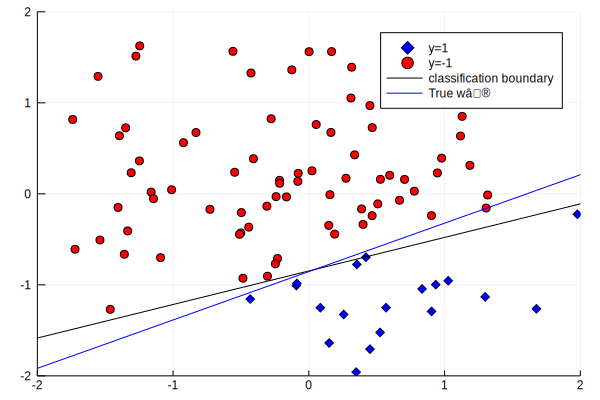

In [163]:
# Store the correct decision for each datapoint in y
# sign of x, returning -1, 0, or +1
y_100 = sign.(X_100*w2♮);
w_100_final = perceptron(X_100,y_100)
plot_perceptron(X_100,y_100,w2♮,w_100_final)

##### Perceptron run for n = 20

algorithm converged 17iterations only

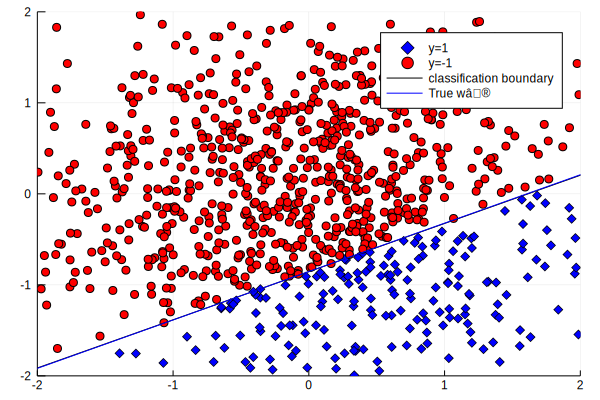

In [164]:
# Store the correct decision for each datapoint in y
# sign of x, returning -1, 0, or +1
y_1000 = sign.(X_1000*w2♮);
w_1000_final = perceptron(X_1000,y_1000)
plot_perceptron(X_1000,y_1000,w2♮,w_1000_final)

# d) Run perceptron on data set of size n = 1000 with dimension d = 10

##### Perceptron run for n = 1000 in 10 dimentions. 
##### As data is in more than two dimentions, plot (which is 2-D) is not very intuitive in terms of line of seperation. Even though perceptron converges in 13 iteraitons. 

In [99]:
# set dimensions
d_10 = 10
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X_1000_10 = [randn(n_1000, d_10) ones(n_1000)]
# Generate the target function w♮
w10♮ = randn(d_10+1)

11-element Array{Float64,1}:
  0.09295287529837899
  1.2405275121117183 
 -0.7572815213974944 
  0.6898626257391324 
 -0.4241884982054228 
  0.4203561481382908 
 -0.13689000099878507
 -0.4384395621992105 
  0.40744988014903866
 -0.7395093467288412 
 -0.7082525169144553 

algorithm converged 13iterations only

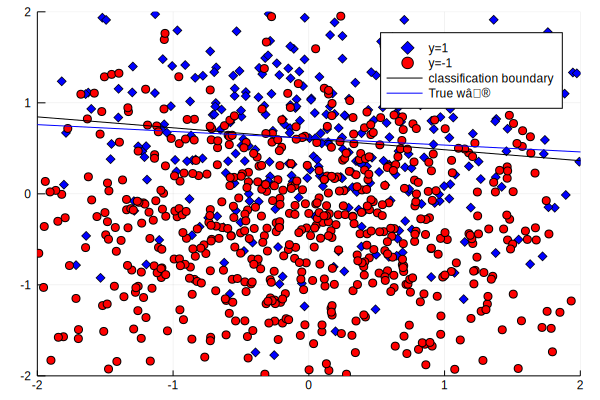

In [101]:
# Store the correct decision for each datapoint in y
# sign of x, returning -1, 0, or +1
y_1000_10 = sign.(X_1000_10*w10♮);
w_1000_10_final = perceptron(X_1000_10,y_1000_10)
plot_perceptron(X_1000_10,y_1000_10,w10♮,w_1000_10_final)

# e) Run perceptron on dataset from (d) 100 times.
Plot a histogram for the number of updates that the algorithm takes to converge.

For this portion, make sure your perceptron implementation picks the next consideration point x(t) randomly instead of deterministically.

##### For this problem, slightly modified version of perceptron fucntion is used. 
##### Rather than final W, this function return the number of iterations it took for convergence. 

In [125]:
function perceptron_iterations(X,y;
                    maxsteps=100, # 
                    w = rand(size(X,2))) # initial guess for w
    
    for i = 1:maxsteps
        y_pred = sign.(X*w)
        y_missclassified = ones(size(X,1)) - (y_pred.==y)*1
        if sum(y_missclassified) == 0
            return i
            break
        end
        y_multiply = y.*y_missclassified
        w_incremental = X'*y_multiply
        w = w+w_incremental
    end    
    

    ## YOUR CODE HERE p
    
    return i
end

perceptron_iterations (generic function with 1 method)

##### no_exp is variable governing number of iteraitons. 
##### please note that h[j] = 100 means that perceptron did not converge within 100 iterations for that experiment. 


In [137]:
no_exp = 100
h = zeros(no_exp)
for j = 1:no_exp
    # set dimensions
    d_10 = 10
    # generate input: the rows of X are the data points
    # notice the last column encodes the offset
    X_1000_10 = [randn(n_1000, d_10) ones(n_1000)]
    # Generate the target function w♮
    w10♮ = randn(d_10+1)
    # Store the correct decision for each datapoint in y
    # sign of x, returning -1, 0, or +1
    y_1000_10 = sign.(X_1000_10*w10♮);
    h[j] = perceptron_iterations(X_1000_10,y_1000_10)
end

In [138]:
h

100-element Array{Float64,1}:
 11.0
 10.0
 13.0
 16.0
 15.0
 12.0
 11.0
 14.0
 12.0
 15.0
 20.0
  2.0
  7.0
  ⋮  
 23.0
 13.0
 14.0
 10.0
 20.0
  8.0
 12.0
 14.0
 11.0
 11.0
 15.0
 93.0

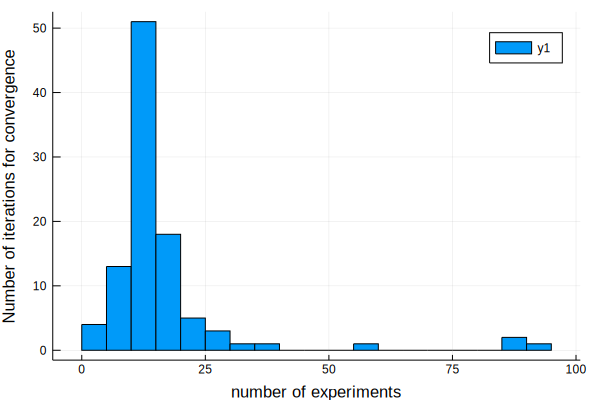

In [144]:
using Plots
p1 = histogram(h,xlabel="number of experiments", ylabel = "Number of iterations for convergence")
plot(p1)

##### As historgram above shows, most of the experiments converged within 30 iterations. 

# g) Add an outlier. What happens?

In [158]:
### DO NOT CHANGE THIS CODE BLOCK ###
# (re)generate data with same random seed, adding one outlier
Random.seed!(3)

# set dimensions
n = 50
d = 2
# generate input
X = [randn(n, d) ones(n)]
w♮ = randn(d+1)
y = sign.(X*w♮);
y[1] *= -1 # flip classification of the first data point

1.0

In [159]:
# run the perceptron and see what happens
perceptron(X,y,maxsteps=50)

algorithm did not converged even after50iterations

3-element Array{Float64,1}:
 -8.91156595752908 
  9.86614075726375 
  6.851999190276057

##### As we can see from the print messgae, perceptron did not converge after 50 iterations. 

# h) Try out one idea to fix perceptron

##### One way to fix this problem is allow mis-classifications for some numbers of (x,y). 
##### In following perceptron_fix function, this problem is fixed by breaking out as soon as number of milclassifications goes below n*tolerance. 
##### Default tolerance in below function is 5%. 

In [122]:
function perceptron_fix(X,y;
                    maxsteps=100, # 
                    w = rand(size(X,2)), tolerance = 0.05) # initial guess for w
    
    for i = 1:maxsteps
        y_pred = sign.(X*w)
        y_missclassified = ones(size(X,1)) - (y_pred.==y)*1
        if sum(y_missclassified) < size(X,1)*tolerance
            print("algorithm converged ", i-1, "iterations only")
            break
        end
        y_multiply = y.*y_missclassified
        w_incremental = X'*y_multiply
        w = w+w_incremental
        if i >= maxsteps
            print("algorithm did not converged even after", maxsteps, "iterations")
        end
    end    
    

    ## YOUR CODE HERE p
    
    return w
end

perceptron_fix (generic function with 1 method)

In [123]:
perceptron_fix(X,y,maxsteps=50)

algorithm converged 5iterations only

3-element Array{Float64,1}:
 -11.871244775722971
  16.686249800219308
   5.915068922393004

##### As can be seen above perceptron converges after 5 iterations. 

## Question 4

##### Question 1 took about 3 hours. Even though i did this part on python - which i am familier with, It took time as i was exploring plotting lat longs - which was new for me. 
##### Question 2 took about 1 hours. 
##### Question 3 took about 2 hours. It was quite suprising for me. It was first time i was working on Julia but it was very quick. Starting code ofcourse helped a lot. 

##### In total it took around 8 hours - including clean up, discussion & reviewing it with partner and making it ready for submission. 